In [1]:
import cmocean.cm as cm
import glob
import matplotlib.pyplot as plt
import matplotlib as mpl
from cycler import cycler
import numpy as np
import xarray as xr

%matplotlib inline
plt.rcParams['font.size'] = 14

In [6]:
def get_data_backward_gi(month, year, section = 2):
    amonth = glob.glob('/data/sallen/results/Ariane/InGIslands/*'+month+str(year)+'/ariane_positions_quantitative.nc')
    mydata = xr.open_dataset(amonth[0])
    sals = mydata.final_salt[(mydata.final_section==section)]
    transports = mydata.final_transp[(mydata.final_section==section)]
    for f in amonth[1:]:
        mydata = xr.open_dataset(f)
        sals = np.concatenate((sals, mydata.final_salt[(mydata.final_section==section)]))
        transports = np.concatenate((transports, mydata.final_transp[(mydata.final_section==section)]))
    return sals, transports

In [7]:
def get_data_forward_gi(month, year, section = 2):
    amonth = glob.glob('/data/sallen/results/Ariane/SouthGIslands//*'+month+str(year)+'/ariane_positions_quantitative.nc')
    mydata = xr.open_dataset(amonth[0])
    sals = mydata.init_salt[(mydata.final_section==section)]
    transports = mydata.init_transp[(mydata.final_section==section)]
    for f in amonth[1:]:
        mydata = xr.open_dataset(f)
        sals = np.concatenate((sals, mydata.init_salt[(mydata.final_section==section)]))
        transports = np.concatenate((transports, mydata.init_transp[(mydata.final_section==section)]))
    return sals, transports

In [8]:
def get_data_forward(month, year, section=2):
    amonth = glob.glob('/data/sallen/results/Ariane/FullNorth/*'+month+str(year)+'/ariane_positions_quantitative.nc')
    mydata = xr.open_dataset(amonth[0])
    sals = mydata.init_salt[(mydata.final_section==section)]
    transports = mydata.init_transp[(mydata.final_section==section)]
    for f in amonth[1:]:
        mydata = xr.open_dataset(f)
        sals = np.concatenate((sals, mydata.init_salt[(mydata.final_section==section)]))
        transports = np.concatenate((transports, mydata.init_transp[(mydata.final_section==section)]))
    return sals, transports

In [9]:
def get_data_backward(month, year, section=2):
    amonth = glob.glob('/data/sallen/results/Ariane/BackNorth/*'+month+str(year)+'/ariane_positions_quantitative.nc')
    mydata = xr.open_dataset(amonth[0])
    sals = mydata.init_salt[(mydata.final_section==section)]
    transports = mydata.init_transp[(mydata.final_section==section)]
    for f in amonth[1:]:
        mydata = xr.open_dataset(f)
        sals = np.concatenate((sals, mydata.init_salt[(mydata.final_section==section)]))
        transports = np.concatenate((transports, mydata.init_transp[(mydata.final_section==section)]))
    return sals, transports

In [13]:
month = {1:'jan', 2: 'feb', 3: 'mar', 4: 'apr', 5: 'may', 6: 'jun', 7: 'jul', 
         8: 'aug', 9: 'sep', 10: 'oct', 11: 'nov', 12: 'dec'}
sals, transports = np.array([]), np.array([])
months = 4*np.ones_like(sals)
years = 15*np.ones_like(sals)
for y in [15, 16]:
    print(y)
    for m in month:
        newsals, newtransports = get_data_backward(month[m], y)
        newmonths = m*np.ones_like(newsals)
        newyears = y*np.ones_like(newsals)
        sals = np.concatenate((sals, newsals))
        transports = np.concatenate((transports, newtransports))
        months = np.concatenate((months, newmonths))
        years = np.concatenate((years, newyears))

15
16


In [23]:
fsals, ftransports = np.array([]), np.array([])
fmonths = 4*np.ones_like(fsals)
fyears = 15*np.ones_like(fsals)
for y in [15, 16]:
    print(y)
    for m in month:
        newsals, newtransports = get_data_forward(month[m], y)
        newmonths = m*np.ones_like(newsals)
        newyears = y*np.ones_like(newsals)
        fsals = np.concatenate((fsals, newsals))
        ftransports = np.concatenate((ftransports, newtransports))
        fmonths = np.concatenate((fmonths, newmonths))
        fyears = np.concatenate((fyears, newyears))

15
16


In [25]:
gsals, gtransports = np.array([]), np.array([])
gmonths = 4*np.ones_like(gsals)
gyears = 15*np.ones_like(gsals)
for y in [15, 16]:
    print(y)
    for m in month:
        newsals, newtransports = get_data_backward_gi(month[m], y)
        newmonths = m*np.ones_like(newsals)
        newyears = y*np.ones_like(newsals)
        gsals = np.concatenate((gsals, newsals))
        gtransports = np.concatenate((gtransports, newtransports))
        gmonths = np.concatenate((gmonths, newmonths))
        gyears = np.concatenate((gyears, newyears))

15
16


In [26]:
gfsals, gftransports = np.array([]), np.array([])
gfmonths = 4*np.ones_like(gfsals)
gfyears = 15*np.ones_like(gfsals)
for y in [15, 16]:
    print(y)
    for m in month:
        newsals, newtransports = get_data_forward_gi(month[m], y)
        newmonths = m*np.ones_like(newsals)
        newyears = y*np.ones_like(newsals)
        gfsals = np.concatenate((gfsals, newsals))
        gftransports = np.concatenate((gftransports, newtransports))
        gfmonths = np.concatenate((gfmonths, newmonths))
        gfyears = np.concatenate((gfyears, newyears))

15
16


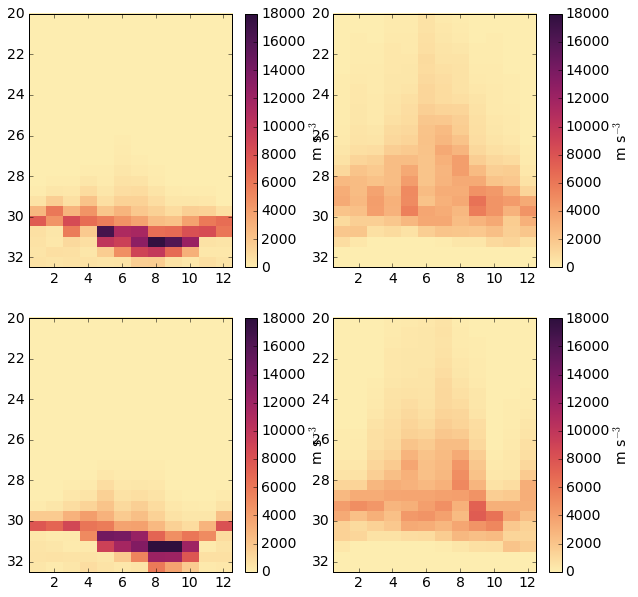

In [35]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
salt_bins = np.arange(20, 33, 0.5)
#salt_bins = np.arange(29.5-12*1.5, 31+4*1.5, 1.5)
month_bins = np.arange(0.5, 13, 1)
for ix, year in enumerate([15, 16]):
    c, xedge, yedge, im = axs[ix, 0].hist2d(np.concatenate((months[years==year], gmonths[gyears==year])), 
                                np.concatenate((sals[years==year], gsals[gyears==year])),
                                weights=np.concatenate((transports[years==year], gtransports[gyears==year]))/24/30.5,
                                bins=[month_bins, salt_bins], cmap=cm.matter, vmax=18000)
    c1 = c.copy()
    cb1 = fig.colorbar(im, ax=axs[ix, 0]) 
    cb1.set_label('m s$^{-3}$', labelpad=2)
    c, xedge, yedge, im = axs[ix, 1].hist2d(np.concatenate((fmonths[fyears==year], gfmonths[gfyears==year])), 
                                np.concatenate((fsals[fyears==year], gfsals[gfyears==year])),
                                weights=np.concatenate((ftransports[fyears==year], gftransports[gfyears==year]))/24/30.5,
                                bins=[month_bins, salt_bins], cmap=cm.matter, vmax=18000)
    cb1 = fig.colorbar(im, ax=axs[ix, 1]) 
    cb1.set_label('m s$^{-3}$', labelpad=2)
for ix in range(2):
    for iy in range(2):
        axs[ix,iy].invert_yaxis()
ax.set_xlabel("Month in 2015");
#axs[0].set_ylabel('Salinity (g kg$^{-1}$)')
#axs[0].set_title('Flux into Strait of Georgia')
#axs[1].set_title('Flux out of Strait of Georgia');

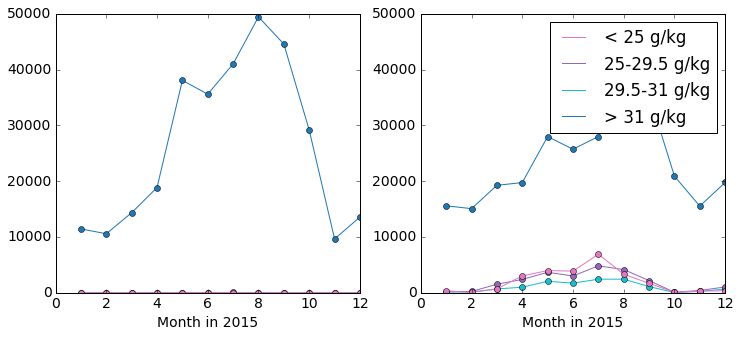

In [36]:
mycolors = ['#e377c2', '#9467bd', '#17becf', '#1f77b4']
custom_lines = [mpl.lines.Line2D([0], [0], color=mycolors[0]),
                mpl.lines.Line2D([0], [0], color=mycolors[1]),
                mpl.lines.Line2D([0], [0], color=mycolors[2]),
                mpl.lines.Line2D([0], [0], color=mycolors[3])]
mpl.rcParams['axes.prop_cycle'] = cycler(color=mycolors)
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].plot(range(1, 13), np.sum(c1[:, 13:], axis=1), 'o-', color=mycolors[3])
axs[1].plot(range(1, 13), np.sum(c[:, 13:], axis=1), 'o-', color=mycolors[3])
axs[0].plot(range(1, 13), c1[:, 12], 'o-', color=mycolors[2])
axs[1].plot(range(1, 13), c[:, 12], 'o-', color=mycolors[2])
axs[0].plot(range(1, 13), c1[:, 11]+c1[:, 10]+c1[:, 9], 'o-', color=mycolors[1])
axs[1].plot(range(1, 13), c[:, 11]+c[:, 10]+c[:, 9], 'o-', color=mycolors[1])
axs[0].plot(range(1, 13), np.sum(c1[:, :9], axis=1), 'o-', color=mycolors[0])
axs[1].plot(range(1, 13), np.sum(c[:, :9], axis=1), 'o-', color=mycolors[0])
axs[1].legend(custom_lines, ['< 25 g/kg', '25-29.5 g/kg', '29.5-31 g/kg', '> 31 g/kg'])
for ax in axs:
    ax.set_ylim((0, 50e3))
    ax.set_xlabel('Month in 2015')
# doesn't make sense, check ranges.

In [37]:
print ((np.sum(c1, axis=1) - np.sum(c, axis=1)).mean())
print (np.sum(c1, axis=1).mean())
print (np.sum(c1, axis=1).mean()*20*1020*30.5*86400/1000.)
for year in [15, 16]:
    print (year)
    print ((transports[years==year].sum())/(24*365))
    print ((ftransports[fyears==year].sum())/(24*365))
    print ((gtransports[gyears==year].sum())/(24*365))
    print ((gftransports[gfyears==year].sum())/(24*365))
print ((transports.sum()+gtransports.sum() - ftransports.sum() - gftransports.sum())/(24.*365))

-1840.65926227
26385.7242274
1.41844587387e+12
15
25917.4568568
21765.1104061
2506.72476106
7879.58575064
16
25477.8262723
21442.0676272
2256.57944833
7737.51442225
-2665.69086777


In [13]:
saltflux=np.zeros((12))
fsaltflux = np.zeros_like(saltflux)
gsaltflux = np.zeros_like(saltflux)
gfsaltflux = np.zeros_like(saltflux)

print(saltflux.shape)
for i in range(1, 13):
    saltflux[i-1] = (sals[months==i]*transports[months==i]).sum()*1020/1e6/24/30.5
    fsaltflux[i-1] = (fsals[fmonths==i]*ftransports[fmonths==i]).sum()*1020/1e6/24/30.5
    gsaltflux[i-1] = (gsals[gmonths==i]*gtransports[gmonths==i]).sum()*1020/1e6/24/30.5
    gfsaltflux[i-1] = (gfsals[gfmonths==i]*gftransports[gfmonths==i]).sum()*1020/1e6/24/30.5

(12,)


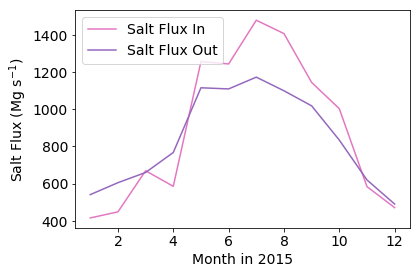

In [14]:
fig, ax = plt.subplots(1, 1)
ax.plot(range(1, 13), saltflux+gsaltflux, label='Salt Flux In')
ax.plot(range(1, 13), fsaltflux+gfsaltflux, label='Salt Flux Out')
#plt.plot(range(1,13), fsaltflux)
#plt.plot(range(1, 13), gfsaltflux)
ax.legend(loc='upper left')
ax.set_ylabel('Salt Flux (Mg s$^{-1}$)')
ax.set_xlabel('Month in 2015');

In [15]:
print (saltflux.sum()+gsaltflux.sum(), fsaltflux.sum()+gfsaltflux.sum(), gfsaltflux.sum())

10704.8295105 10030.7260964 2720.6983505


In [16]:
fraserriver = 3500 * 86400 * 365
fraserriver/1e13

0.0110376

In [17]:
section=5
ssals, stransports = get_data_forward('apr', section=section)
smonths = 4*np.ones_like(ssals)
for m in month:
    print(m)
    newsals, newtransports = get_data_forward(month[m], section=section)
    newmonths = m*np.ones_like(newsals)
    stransports = np.concatenate((stransports, newtransports))
    smonths = np.concatenate((smonths, newmonths))

1
2
3
5
6
7
8
9
10
11
12


In [18]:
print (stransports.sum()/(24*365))

452.693001596


In [19]:
section=5
ssals, stransports = get_data_backward('apr', section=section)
smonths = 4*np.ones_like(ssals)
for m in month:
    print(m)
    newsals, newtransports = get_data_backward(month[m], section=section)
    newmonths = m*np.ones_like(newsals)
    stransports = np.concatenate((stransports, newtransports))
    smonths = np.concatenate((smonths, newmonths))
print (stransports.sum()/(24*365))

1
2
3
5
6
7
8
9
10
11
12
177.519283205


In [20]:
section=5
ssals, stransports = get_data_forward_gi('apr', section=section)
smonths = 4*np.ones_like(ssals)
for m in month:
    print(m)
    newsals, newtransports = get_data_forward_gi(month[m], section=section)
    newmonths = m*np.ones_like(newsals)
    stransports = np.concatenate((stransports, newtransports))
    smonths = np.concatenate((smonths, newmonths))

1
2
3
5
6
7
8
9
10
11
12


In [21]:
print (stransports.sum()/(24*365))

26.0410419916


In [22]:
section=5
ssals, stransports = get_data_backward_gi('apr', section=section)
smonths = 4*np.ones_like(ssals)
for m in month:
    print(m)
    newsals, newtransports = get_data_backward_gi(month[m], section=section)
    newmonths = m*np.ones_like(newsals)
    stransports = np.concatenate((stransports, newtransports))
    smonths = np.concatenate((smonths, newmonths))
print (stransports.sum()/(24*365))

1
2
3
5
6
7
8
9
10
11
12
13.8794466385


In [56]:
print(21.1+7.7+4+0.3)
print(25.5+2.6+2.5+0.2)

33.099999999999994
30.8
